In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Handiling Categorical values 
#### Frequent Category Imputation

In [2]:
df = pd.read_csv('train.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [3]:
df.shape

(1460, 4)

In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [6]:
dfw = pd.read_csv('train.csv')

In [7]:
dfw

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [8]:
cat_feat = [feat for feat in dfw.columns if dfw[feat].dtype == 'O']

In [9]:
cat_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
feat_han = [feat for feat in cat_feat if dfw[feat].isnull().sum()>0]

In [11]:
dfw[feat_han].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [12]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [13]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [14]:
dfw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Frequency category imputation 

In [15]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


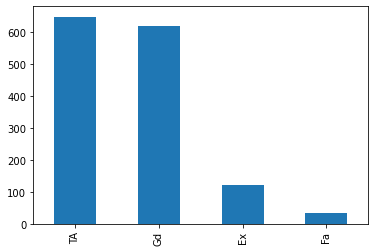

In [17]:
df['BsmtQual'].value_counts().plot.bar()

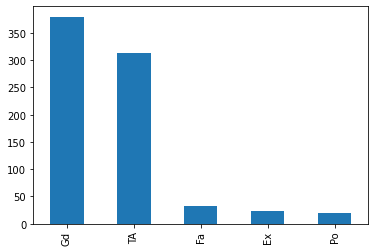

In [18]:
df['FireplaceQu'].value_counts().plot.bar()

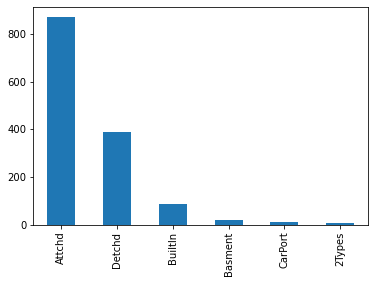

In [19]:
df['GarageType'].value_counts().plot.bar()

In [20]:
cat_fea_df = [feat for feat in df.columns if feat != 'SalePrice']

In [21]:
cat_fea_df

['BsmtQual', 'FireplaceQu', 'GarageType']

In [22]:
for i in cat_fea_df:
    print(df[i].mode()[0])

TA
Gd
Attchd


In [23]:
for i in cat_fea_df:
    pp = df[i].mode()[0]
    df[i].fillna(pp,inplace = True)

In [24]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd          Gd     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [25]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [26]:
df['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [27]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages

1. Easy To implement
2. Fater way to implement

#### Disadvantages

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

## Adding a variable to Capture NAN 

In [28]:
df1 = pd.read_csv('train.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [29]:
df1.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [30]:
catfeat = ['BsmtQual','FireplaceQu','GarageType']

In [31]:
for feat in catfeat:
    df1[feat+'_var'] = np.where(df1[feat].isnull(),1,0)
    mod = df[feat].mode()
    df1[feat].fillna(mod,inplace=True)

In [32]:
df1.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_var  FireplaceQu_var  \
0       Gd          Gd     Attchd     208500             0                1   
1       Gd          TA     Attchd     181500             0                0   
2       Gd          TA     Attchd     223500             0                0   
3       TA          Gd     Detchd     140000             0                0   
4       Gd          TA     Attchd     250000             0                0   

   GarageType_var  
0               0  
1               0  
2               0  
3               0  
4               0

## Suppose if you have more frequent categories, we just replace NAN with a new category

In [33]:
df2 = pd.read_csv('train.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [34]:
def imp_nan_miss(df2,var):
    df2[var+'_varb'] = np.where(df2[var].isnull(),'missing',df[var])

In [35]:
for feat in cat_fea_df:
    imp_nan_miss(df2,feat)

In [36]:
df2.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQual_varb FireplaceQu_varb  \
0       Gd         NaN     Attchd     208500            Gd          missing   
1       Gd          TA     Attchd     181500            Gd               TA   
2       Gd          TA     Attchd     223500            Gd               TA   
3       TA          Gd     Detchd     140000            TA               Gd   
4       Gd          TA     Attchd     250000            Gd               TA   

  GarageType_varb  
0          Attchd  
1          Attchd  
2          Attchd  
3          Detchd  
4          Attchd

In [37]:
df2.isnull().sum()

BsmtQual             37
FireplaceQu         690
GarageType           81
SalePrice             0
BsmtQual_varb         0
FireplaceQu_varb      0
GarageType_varb       0
dtype: int64

In [38]:
df2.drop(['BsmtQual','FireplaceQu','GarageType'],axis = 1,inplace=True)
#axis = 1 drops columns

In [40]:
df2.head()

SalePrice BsmtQual_varb FireplaceQu_varb GarageType_varb
0     208500            Gd          missing          Attchd
1     181500            Gd               TA          Attchd
2     223500            Gd               TA          Attchd
3     140000            TA               Gd          Detchd
4     250000            Gd               TA          Attchd

In [41]:
df2

SalePrice BsmtQual_varb FireplaceQu_varb GarageType_varb
0        208500            Gd          missing          Attchd
1        181500            Gd               TA          Attchd
2        223500            Gd               TA          Attchd
3        140000            TA               Gd          Detchd
4        250000            Gd               TA          Attchd
...         ...           ...              ...             ...
1455     175000            Gd               TA          Attchd
1456     210000            Gd               TA          Attchd
1457     266500            TA               Gd          Attchd
1458     142125            TA          missing          Attchd
1459     147500            TA          missing          Attchd

[1460 rows x 4 columns]

In [42]:
df2.isnull().sum()

SalePrice           0
BsmtQual_varb       0
FireplaceQu_varb    0
GarageType_varb     0
dtype: int64

In [44]:
for i in df2.columns:
    if i!= 'SalePrice':
        print(df2[i].unique())

['Gd' 'TA' 'Ex' 'missing' 'Fa']
['missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'missing' 'Basment' '2Types']


In [45]:
pd.get_dummies(df2['BsmtQual_varb'],drop_first=True)

Fa  Gd  TA  missing
0      0   1   0        0
1      0   1   0        0
2      0   1   0        0
3      0   0   1        0
4      0   1   0        0
...   ..  ..  ..      ...
1455   0   1   0        0
1456   0   1   0        0
1457   0   0   1        0
1458   0   0   1        0
1459   0   0   1        0

[1460 rows x 4 columns]

In [46]:
df2

SalePrice BsmtQual_varb FireplaceQu_varb GarageType_varb
0        208500            Gd          missing          Attchd
1        181500            Gd               TA          Attchd
2        223500            Gd               TA          Attchd
3        140000            TA               Gd          Detchd
4        250000            Gd               TA          Attchd
...         ...           ...              ...             ...
1455     175000            Gd               TA          Attchd
1456     210000            Gd               TA          Attchd
1457     266500            TA               Gd          Attchd
1458     142125            TA          missing          Attchd
1459     147500            TA          missing          Attchd

[1460 rows x 4 columns]